In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
pengs = sns.load_dataset('penguins')

In [18]:
pengs.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [16]:
cut_list = [np.min(pengs['bill_length_mm']), 40, 45, 50, 55, np.max(pengs['bill_length_mm'])]

In [17]:
pd.cut(pengs['bill_length_mm'], cut_list).value_counts().sort_index()

(32.1, 40.0]     99
(40.0, 45.0]     77
(45.0, 50.0]    113
(50.0, 55.0]     47
(55.0, 59.6]      5
Name: bill_length_mm, dtype: int64

In [20]:
(
pengs
    .assign(bill_length = pd.cut(pengs['bill_length_mm'], cut_list))
    .pivot_table(index='bill_length',
                 columns='species',
                 aggfunc='size')
)

species,Adelie,Chinstrap,Gentoo
bill_length,,,
"(32.1, 40.0]",99,0,0
"(40.0, 45.0]",48,6,23
"(45.0, 50.0]",3,32,78
"(50.0, 55.0]",0,28,19
"(55.0, 59.6]",0,2,3


In [26]:
(
pengs.sample(10)
    .style.background_gradient(subset=['bill_length_mm', 'bill_depth_mm'], cmap='RdPu')
    .background_gradient(subset='flipper_length_mm', cmap='YlGnBu')
    .background_gradient(subset='body_mass_g', cmap='OrRd')
)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
328,Gentoo,Biscoe,43.300000,14.000000,208.000000,4575.000000,FEMALE
36,Adelie,Dream,38.800000,20.000000,190.000000,3950.000000,MALE
96,Adelie,Dream,38.100000,18.600000,190.000000,3700.000000,FEMALE
220,Gentoo,Biscoe,46.100000,13.200000,211.000000,4500.000000,FEMALE
186,Chinstrap,Dream,49.700000,18.600000,195.000000,3600.000000,MALE
229,Gentoo,Biscoe,46.800000,15.400000,215.000000,5150.000000,MALE
48,Adelie,Dream,36.000000,17.900000,190.000000,3450.000000,FEMALE
87,Adelie,Dream,36.900000,18.600000,189.000000,3500.000000,FEMALE
100,Adelie,Biscoe,35.000000,17.900000,192.000000,3725.000000,FEMALE
34,Adelie,Dream,36.400000,17.000000,195.000000,3325.000000,FEMALE


In [43]:
nans_percent = pd.DataFrame(round(pengs.isna().mean(), 2)).reset_index()
nans_percent.columns = ['columns', 'percent_of_nan']
nans_percent

,columns,percent_of_nan
0,species,0.00
1,island,0.00
2,bill_length_mm,0.01
3,bill_depth_mm,0.01
4,flipper_length_mm,0.01
5,body_mass_g,0.01
6,sex,0.03


# Bar charts

Text(0, 0.5, 'Count')

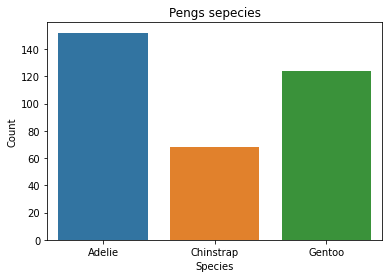

In [54]:
sns.countplot(pengs['species'])
plt.title('Pengs sepecies')
plt.xlabel('Species')
plt.ylabel('Count')

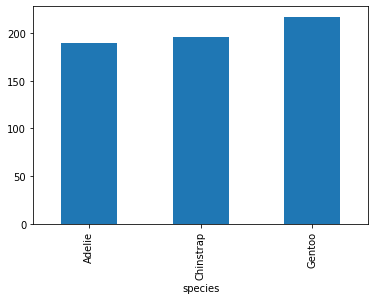

In [60]:
pengs.groupby('species')['flipper_length_mm'].mean().plot.bar()

Text(0, 0.5, 'Count')

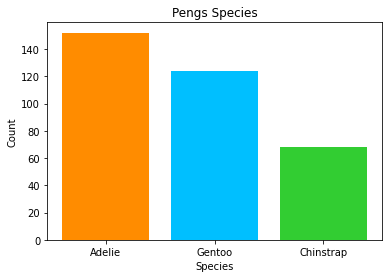

In [81]:
data_sp = pengs['species'].value_counts()

fig, ax = plt.subplots()

ax.bar(x=data_sp.index, height=data_sp.values, color=['darkorange', 'deepskyblue', 'limegreen'])

ax.set_title('Pengs Species')
ax.set_xlabel('Species')
ax.set_ylabel('Count')

# Scatter plots

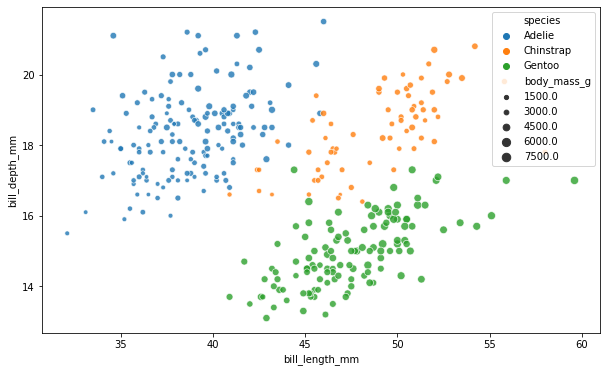

In [79]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=pengs,
                x='bill_length_mm',
                y='bill_depth_mm',
                hue='species',
                size='body_mass_g',
                alpha=0.8)

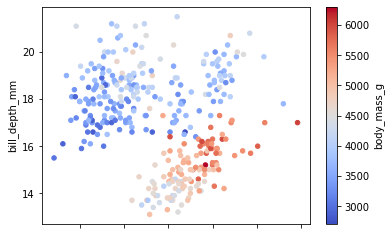

In [77]:
pengs.plot.scatter(x='bill_length_mm', y='bill_depth_mm', c='body_mass_g', cmap='coolwarm')

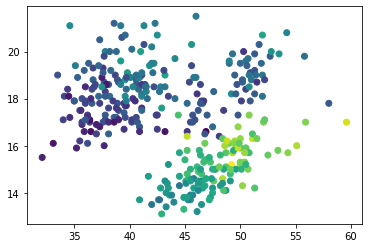

In [107]:
fig, ax = plt.subplots()

plt.scatter(x=pengs['bill_length_mm'],
            y=pengs['bill_depth_mm'],
            c=pengs['body_mass_g'])

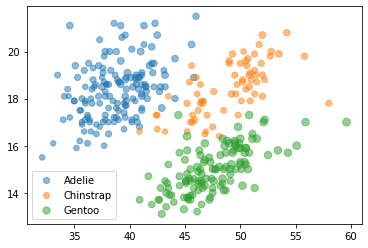

In [112]:
fig, ax = plt.subplots()

for specie in np.unique(pengs['species']):
    filt = pengs['species'] == specie
    ax.scatter(x = pengs[filt]['bill_length_mm'],
               y = pengs[filt]['bill_depth_mm'],
               s = pengs[filt]['body_mass_g'] / 100,
               label = specie,
               alpha = 0.5)


ax.legend()